In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

from application.VGG16 import Vgg16, Vgg19
from Utility.Utility import create_loss_graph, create_metric_graph, create_learning_rate, save_train_history

### callback functions

In [2]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=1e-1, patience=20)
early_stop = EarlyStopping(monitor='val_loss', patience=8)
model_checkpoint = ModelCheckpoint(filepath='../../models/CV/vgg19_checkpoint.hdf5', save_best_only=True)
classes = 6
epoch = 75

In [3]:
model = Vgg19.vgg_nett19(input_shape=(150, 150, 3), classes=classes)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_ (InputLayer)         [(None, 150, 150, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 150, 150, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 128)       147584    
                                                             

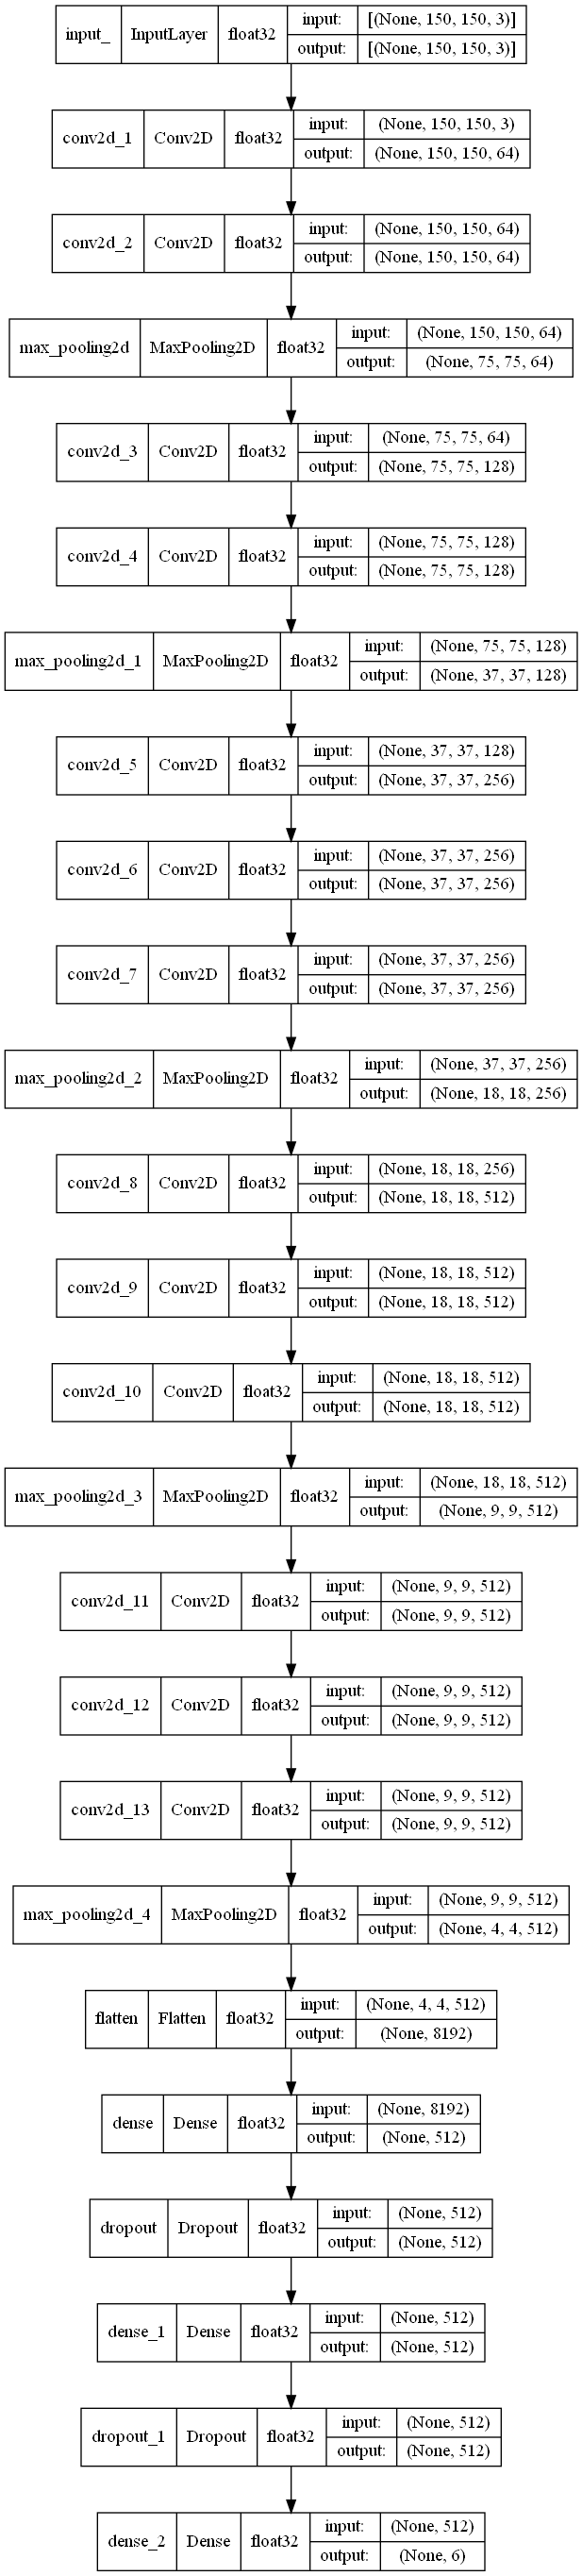

In [7]:
plot_model(model,
           to_file='../../images/computer vision/vgg16.png',
           show_dtype=True,
           show_shapes=True,
           show_layer_names=True)

In [7]:
generator = ImageDataGenerator(rescale=1 / 255.,
                               # zoom_range=(256, 512),
                               validation_split=0.3)
train_gen = generator.flow_from_directory(directory='../../data/places/seg_train/seg_train',
                                          target_size=(150, 150),
                                          batch_size=16,
                                          subset='training')
valid_gen = generator.flow_from_directory(directory='../../data/places/seg_train/seg_train',
                                          target_size=(150, 150),
                                          batch_size=16,
                                          subset='validation')
test_gen = generator.flow_from_directory('../../data/places/seg_test/seg_test')

Found 9826 images belonging to 6 classes.
Found 4208 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [8]:
history = model.fit(x=train_gen,
                    batch_size=16,
                    epochs=epoch,
                    validation_data=valid_gen,
                    callbacks=[reduce_lr, model_checkpoint])

Epoch 1/75
615/615 [==============================] - 641s 1s/step - loss: 4.2091 - accuracy: 0.1761 - val_loss: 4.0612 - val_accuracy: 0.1789 - lr: 0.0100
Epoch 2/75
 63/615 [==>...........................] - ETA: 9:21 - loss: 4.0510 - accuracy: 0.1657

KeyboardInterrupt: 